In [1]:
# REQUIRED LIBRARIES

import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [2]:

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# I AM IMPORTING THE ENCODED DATASET

df=pd.read_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/encoded_dataset.csv")
df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,MARITAL_STATUS,HOUSE_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB CATEGORY,BEGIN_MONTHS,STATUS OF LOAN,TARGET,IS_MALE,OWNS_CAR,OWNS_PROPERTY
0,5065438,2.0,270000.0,0.0,0.0,1.0,-13258,-2300,1,0,0,0,10,-6,6.0,0,0,1,0
1,5142753,0.0,81000.0,0.0,1.0,0.0,-17876,-377,1,1,1,0,12,-4,0.0,0,0,0,0
2,5111146,0.0,270000.0,1.0,0.0,0.0,-19579,-1028,1,0,1,0,8,0,6.0,0,1,1,1
3,5010310,1.0,112500.0,0.0,0.0,0.0,-15109,-1956,1,0,0,0,3,-3,0.0,0,0,1,1
4,5010835,2.0,139500.0,0.0,0.0,0.0,-17281,-5578,1,1,0,0,4,-29,0.0,0,1,1,1


# <i> <ul>DAYS_BIRTH
    This column is represented in number of days, using simple maths i converted to number of days


In [4]:
df.DAYS_BIRTH

0        -13258
1        -17876
2        -19579
3        -15109
4        -17281
          ...  
537662   -12372
537663   -14160
537664   -24204
537665   -22647
537666   -20082
Name: DAYS_BIRTH, Length: 537667, dtype: int64

In [5]:
df['age'] =  df.DAYS_BIRTH/ 365.25

# Round the age to a reasonable precision
df['age'] = df['age'].round(0)
df['age'] = -1 * df['age']
df=df.drop("DAYS_BIRTH",axis=1)

In [6]:
df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,MARITAL_STATUS,HOUSE_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB CATEGORY,BEGIN_MONTHS,STATUS OF LOAN,TARGET,IS_MALE,OWNS_CAR,OWNS_PROPERTY,age
0,5065438,2.0,270000.0,0.0,0.0,1.0,-2300,1,0,0,0,10,-6,6.0,0,0,1,0,36.0
1,5142753,0.0,81000.0,0.0,1.0,0.0,-377,1,1,1,0,12,-4,0.0,0,0,0,0,49.0
2,5111146,0.0,270000.0,1.0,0.0,0.0,-1028,1,0,1,0,8,0,6.0,0,1,1,1,54.0
3,5010310,1.0,112500.0,0.0,0.0,0.0,-1956,1,0,0,0,3,-3,0.0,0,0,1,1,41.0
4,5010835,2.0,139500.0,0.0,0.0,0.0,-5578,1,1,0,0,4,-29,0.0,0,1,1,1,47.0


# <i> <ul>DAYS_EMPLOYED
    This column is also represented in number of days, using simple maths i converted to number of days

In [7]:
df['years_of_experience'] =  df.DAYS_EMPLOYED/ 365.25

# Round the age to a reasonable precision
df['years_of_experience'] = df['years_of_experience'].round(0)
df['years_of_experience'] = -1 * df['years_of_experience']
df=df.drop("DAYS_EMPLOYED",axis=1)
df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,MARITAL_STATUS,HOUSE_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB CATEGORY,BEGIN_MONTHS,STATUS OF LOAN,TARGET,IS_MALE,OWNS_CAR,OWNS_PROPERTY,age,years_of_experience
0,5065438,2.0,270000.0,0.0,0.0,1.0,1,0,0,0,10,-6,6.0,0,0,1,0,36.0,6.0
1,5142753,0.0,81000.0,0.0,1.0,0.0,1,1,1,0,12,-4,0.0,0,0,0,0,49.0,1.0
2,5111146,0.0,270000.0,1.0,0.0,0.0,1,0,1,0,8,0,6.0,0,1,1,1,54.0,3.0
3,5010310,1.0,112500.0,0.0,0.0,0.0,1,0,0,0,3,-3,0.0,0,0,1,1,41.0,5.0
4,5010835,2.0,139500.0,0.0,0.0,0.0,1,1,0,0,4,-29,0.0,0,1,1,1,47.0,15.0


#<ul><i>AMT_INCOME_TOTAL

In [8]:
df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,MARITAL_STATUS,HOUSE_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB CATEGORY,BEGIN_MONTHS,STATUS OF LOAN,TARGET,IS_MALE,OWNS_CAR,OWNS_PROPERTY,age,years_of_experience
0,5065438,2.0,270000.0,0.0,0.0,1.0,1,0,0,0,10,-6,6.0,0,0,1,0,36.0,6.0
1,5142753,0.0,81000.0,0.0,1.0,0.0,1,1,1,0,12,-4,0.0,0,0,0,0,49.0,1.0
2,5111146,0.0,270000.0,1.0,0.0,0.0,1,0,1,0,8,0,6.0,0,1,1,1,54.0,3.0
3,5010310,1.0,112500.0,0.0,0.0,0.0,1,0,0,0,3,-3,0.0,0,0,1,1,41.0,5.0
4,5010835,2.0,139500.0,0.0,0.0,0.0,1,1,0,0,4,-29,0.0,0,1,1,1,47.0,15.0


In [9]:
df["AMT_INCOME_TOTAL"].nunique()

195

In [10]:
df["ID"].nunique()

25134

# <i><ul>FINDING USEFUL COLUMNS EXTRACTION

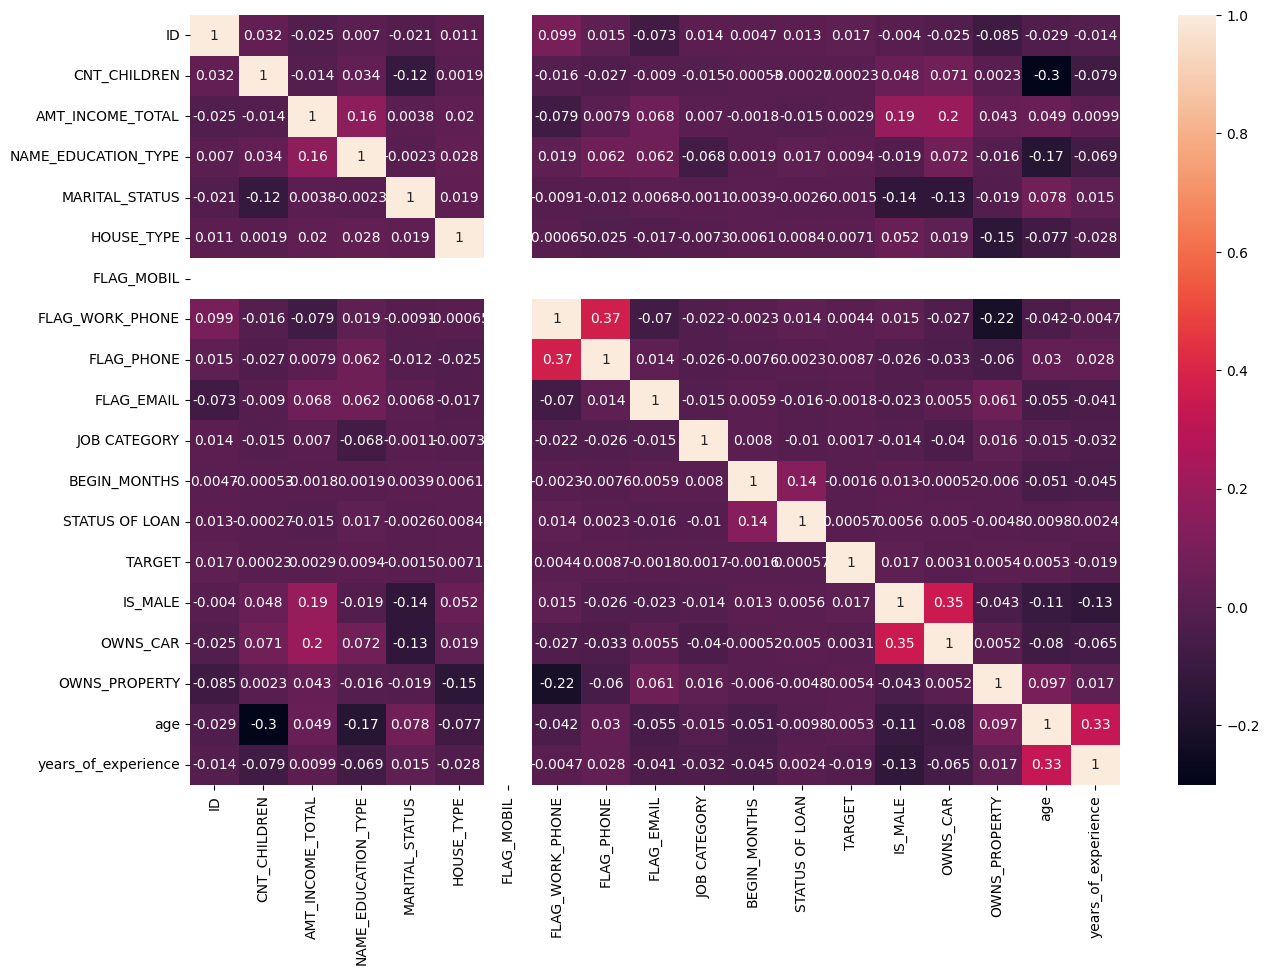

In [11]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [12]:
# CORRELATION W.R.T TARGET

df.corr()["TARGET"]

ID                     0.016717
CNT_CHILDREN           0.000234
AMT_INCOME_TOTAL       0.002887
NAME_EDUCATION_TYPE    0.009385
MARITAL_STATUS        -0.001478
HOUSE_TYPE             0.007131
FLAG_MOBIL                  NaN
FLAG_WORK_PHONE        0.004353
FLAG_PHONE             0.008663
FLAG_EMAIL            -0.001807
JOB CATEGORY           0.001690
BEGIN_MONTHS          -0.001646
STATUS OF LOAN         0.000567
TARGET                 1.000000
IS_MALE                0.016732
OWNS_CAR               0.003076
OWNS_PROPERTY          0.005364
age                    0.005344
years_of_experience   -0.018970
Name: TARGET, dtype: float64

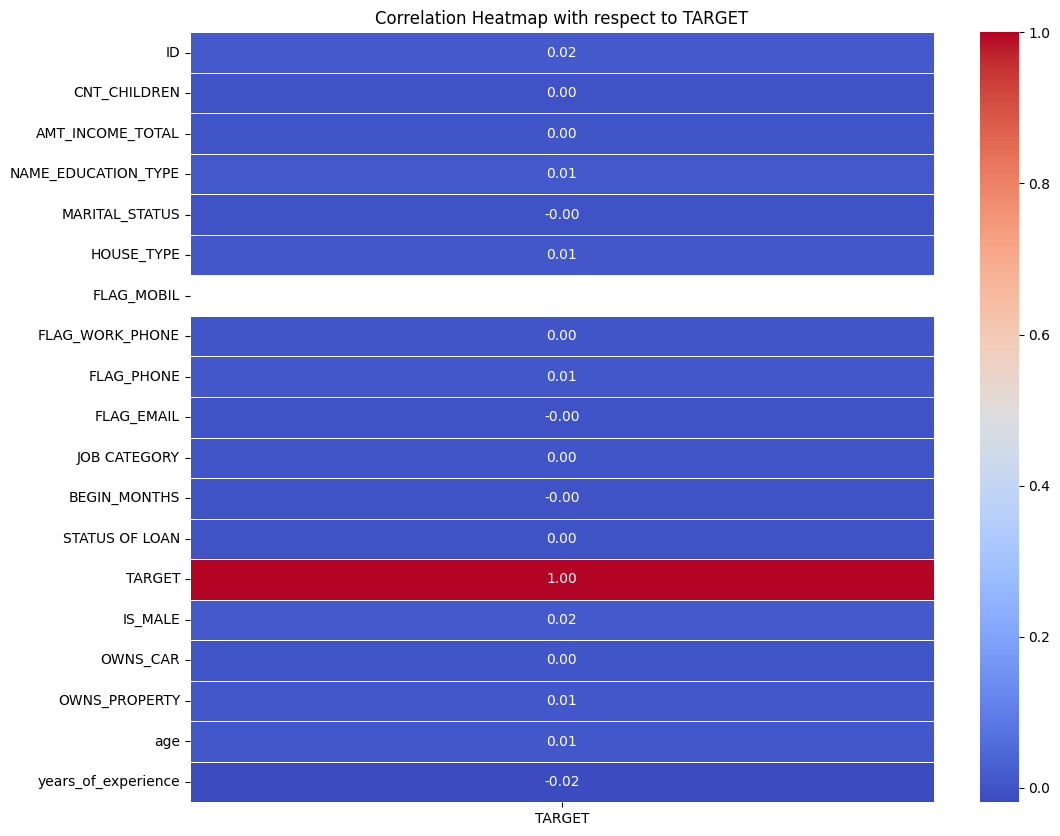

In [13]:
target_column = "TARGET"

# Compute the correlation matrix
corr_matrix = df.corr()

# Select correlations with respect to the target column
corr_with_target = corr_matrix[target_column]

# Create a heatmap for correlations with respect to the target column
plt.figure(figsize=(12, 10))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title(f"Correlation Heatmap with respect to {target_column}")
plt.show()


    "There is no direct linear or inverse relationship between the variables wrt to target"

In [14]:
df.columns

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE',
       'MARITAL_STATUS', 'HOUSE_TYPE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'JOB CATEGORY', 'BEGIN_MONTHS',
       'STATUS OF LOAN', 'TARGET', 'IS_MALE', 'OWNS_CAR', 'OWNS_PROPERTY',
       'age', 'years_of_experience'],
      dtype='object')

In [17]:
df.drop("FLAG_MOBIL",axis=1,inplace=True)

* do we need to encode this column - AMT_INCOME_TOTAL
* do we need to encode the column - ID
* Good values of correlation

